## WEB SCRAPING

### Install beautifulsoup

In [1]:
%pip install beautifulsoup4

In [1]:
import requests
url="https://www.flipkart.com/apple-iphone-14-blue-128-gb/p/itmdb77f40da6b6d?pid=MOBGHWFHSV7GUFWA&lid=LSTMOBGHWFHSV7GUFWAC4ZPNA&marketplace=FLIPKART&q=mobiles&store=tyy%2F4io&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_2_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_7_na_na_na&fm=organic&iid=1fcc639b-01be-477b-917f-2b5bf1d01192.MOBGHWFHSV7GUFWA.SEARCH&ppt=hp&ppn=homepage&ssid=ykp06vacgg0000001702197625663&qH=eb4af0bf07c16429"
response=requests.get(url)
response

<Response [200]>

In [2]:
response.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

### Web scraping OPINDIA website

In [7]:
url="https://www.opindia.com/latest-news/?nocache"
response=requests.get(url)
response

<Response [200]>

### Web scraping can be done only when Response code is 200

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arc
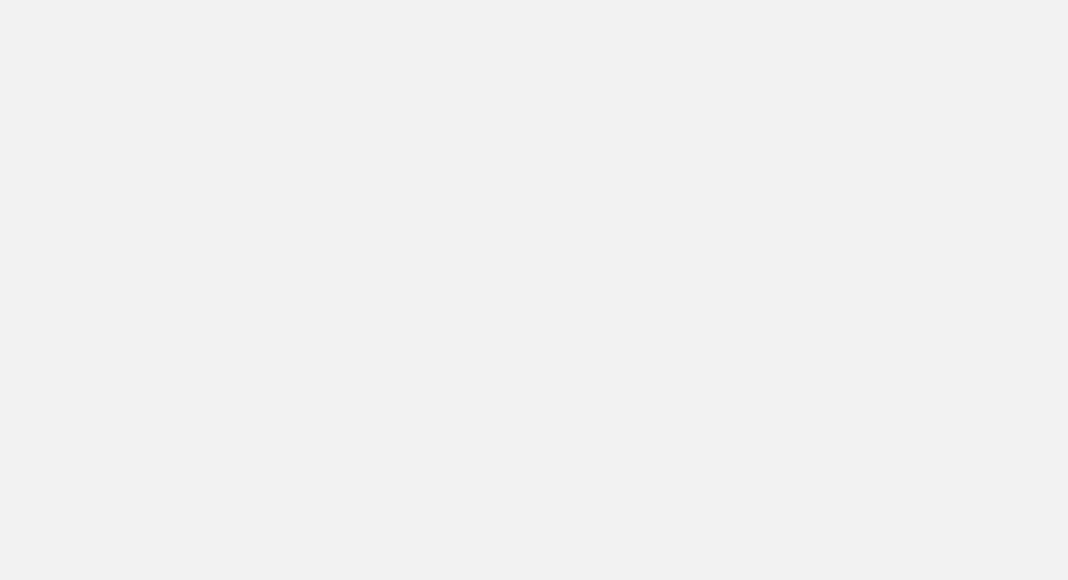

In [9]:
from bs4 import BeautifulSoup
bs=BeautifulSoup(response.content)
bs

In [10]:
headings=bs.find_all('h3',class_="entry-title td-module-title")
headings[0:5]

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/" rel="bookmark" title="First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan">First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/center-redefines-terrorism-includes-actions-threatens-india-economic-security/" rel="bookmark" title="Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report ">Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report </a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/sanjay-raut-sedition-objectionable-ar

In [11]:
headings[0].text

'First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan'

In [12]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/'

### Webscraping all headlines and urls

In [13]:
def get_headings_and_links(url):
    import requests
    response=requests.get(url)
    from bs4 import BeautifulSoup
    bs=BeautifulSoup(response.content)
    headings=bs.find_all('h3',class_="entry-title td-module-title")
    headline=[]
    links=[]
    for i in headings:
        h=i.text
        headline.append(h)
        l=i.find('a').get('href')
        links.append(l)
    return headline,links    

In [14]:
url

'https://www.opindia.com/latest-news/?nocache'

In [15]:
headlines,links=get_headings_and_links(url)


In [17]:
headlines[0:5]

['Heart-rending visuals of weeping children at Sabarimala go viral: This is what made them cry',
 'First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan',
 'Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report\xa0',
 'Sanjay Raut booked for writing an objectionable article against PM Modi in ‘Saamna’, defends saying ‘we have democracy’: Details',
 'Another BJP surprise in Rajasthan: Bhajanlal Sharma to be next CM, Diya Kumari and Prem Chand Bairwa to be the Deputy CMs']

In [18]:
links[0:5]

['https://www.opindia.com/2023/12/heart-rending-visuals-of-weeping-children-at-sabarimala-here-is-the-story/',
 'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/',
 'https://www.opindia.com/2023/12/center-redefines-terrorism-includes-actions-threatens-india-economic-security/',
 'https://www.opindia.com/2023/12/sanjay-raut-sedition-objectionable-article-pm-modi-saamna-defends-democracy/',
 'https://www.opindia.com/2023/12/rajasthan-bhajanlal-sharma-next-rajasthan-cm-diya-kumari-prem-chand-bairwa-deputy-cm/']

### Fetching news date and article

In [19]:
links[0]

'https://www.opindia.com/2023/12/heart-rending-visuals-of-weeping-children-at-sabarimala-here-is-the-story/'

In [20]:
response2=requests.get(links[0])
response2

<Response [200]>

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Viral pictures of crying kids at Sabarimala emerges: Here's the story</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Several videos of young Sabarimala devotees crying and seeking help to find their parents have gone viral on the internet. | OpIndia News" name="description"/>
<link href="https://www.opindia.com/2023/12/heart-rending-visuals-of-weeping-children-at-sabarimala-here-is-the-story/" rel="canonical">
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Viral pictures of crying kids at Sabarimala emerges: Here's the s
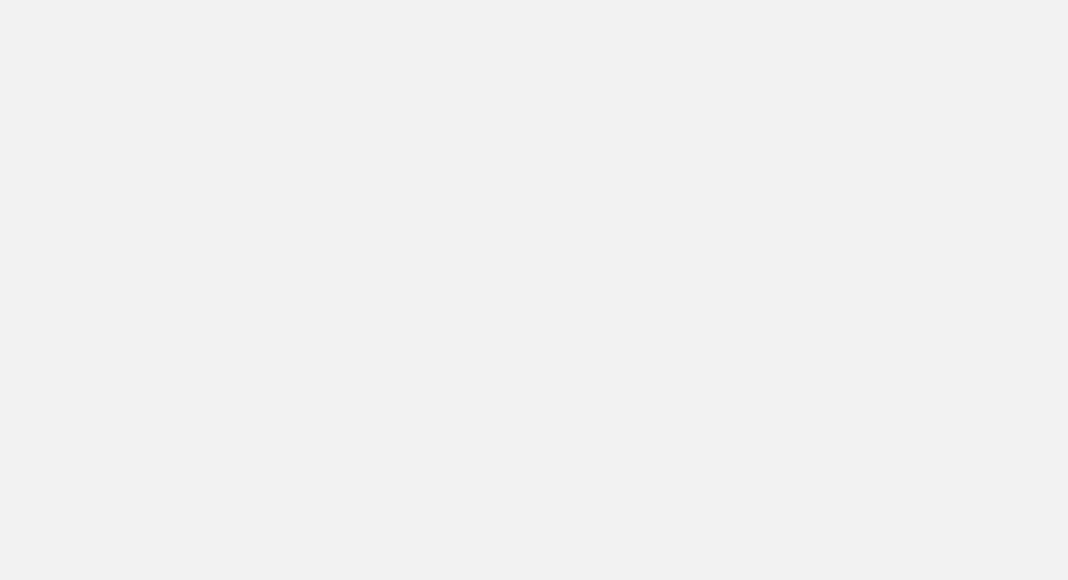

In [21]:
bs2=BeautifulSoup(response2.content)
bs2

In [22]:
date=bs2.find('time',class_="entry-date updated td-module-date")

In [23]:
date.text

'12 December, 2023 '

In [24]:
para=bs2.find_all('p')
para[0:5]

[<p>One of the videos depict a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.</p>,
 <p>Heart-wrenching visuals of a young boy who is a Sabarimala devotee crying for help are going viral on the internet. In the viral videos and pictures, the boy is seen asking for help from a policeman. </p>,
 <p>The video comes amidst allegations of gross mismanagement in this year’s Sabarimala pilgrimage and the deteriorating plight of Hindu devotees in Kerala.</p>,
 <p dir="ltr" lang="qme">💔 <a href="https://t.co/qyHfuNOkZI">pic.twitter.com/qyHfuNOkZI</a></p>,
 <p>The video depicts a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.</p>

In [25]:
para[0].text

'One of the videos depict a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.'

In [26]:
news=""
for i in para:
    news=news+i.text

In [27]:
print(news)

One of the videos depict a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.Heart-wrenching visuals of a young boy who is a Sabarimala devotee crying for help are going viral on the internet. In the viral videos and pictures, the boy is seen asking for help from a policeman. The video comes amidst allegations of gross mismanagement in this year’s Sabarimala pilgrimage and the deteriorating plight of Hindu devotees in Kerala.💔 pic.twitter.com/qyHfuNOkZIThe video depicts a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.A child seeking help to find his father.Pilgrims are suffering in Sabarimala due to poor management & lack 

### Write a function to fetch news dates and articles for provided links

In [28]:
def get_news_date_and_article(links):
    import requests
    from bs4 import BeautifulSoup
    dates=[]
    news=[]
    for i in links:
        response2=requests.get(i)
        bs2=BeautifulSoup(response2.content)
        d=bs2.find('time',class_="entry-date updated td-module-date")
        dates.append(d.text)
        para=bs2.find_all('p')
        n= ""
        for j in para:
            n=n+j.text
        news.append(n)
    return dates,news        

    

In [29]:
links[0:5]

['https://www.opindia.com/2023/12/heart-rending-visuals-of-weeping-children-at-sabarimala-here-is-the-story/',
 'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/',
 'https://www.opindia.com/2023/12/center-redefines-terrorism-includes-actions-threatens-india-economic-security/',
 'https://www.opindia.com/2023/12/sanjay-raut-sedition-objectionable-article-pm-modi-saamna-defends-democracy/',
 'https://www.opindia.com/2023/12/rajasthan-bhajanlal-sharma-next-rajasthan-cm-diya-kumari-prem-chand-bairwa-deputy-cm/']

In [30]:
dates,news=get_news_date_and_article(links)


In [31]:
dates[0:5]

['12 December, 2023 ',
 '12 December, 2023 ',
 '12 December, 2023 ',
 '12 December, 2023 ',
 '12 December, 2023 ']

In [32]:
news[0]

"One of the videos depict a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.Heart-wrenching visuals of a young boy who is a Sabarimala devotee crying for help are going viral on the internet. In the viral videos and pictures, the boy is seen asking for help from a policeman. The video comes amidst allegations of gross mismanagement in this year’s Sabarimala pilgrimage and the deteriorating plight of Hindu devotees in Kerala.💔 pic.twitter.com/qyHfuNOkZIThe video depicts a child desperately seeking his father, who became separated in the crowded area of Nilakkal. With folded hands, the child cried out in front of the police until he spotted his father and joyfully waved when they were finally reunited.A child seeking help to find his father.Pilgrims are suffering in Sabarimala due to poor management & lack

In [33]:
len(links)

104

### Create a dataframe for all the news articles

In [35]:
def get_news_dataframe(url):
    # Get headlines and links
    headlines,links=get_headings_and_links(url)
    # Get news dates and articles
    dates,news=get_news_date_and_article(links)
    # Create a dictionary to get dataframe
    dct={'Date':dates,
         'Headline':headlines,
         'Links':links,
         'article':news}
    # Create the dataframe
    import pandas as pd
    df=pd.DataFrame(dct)
    return df

In [36]:
url

'https://www.opindia.com/latest-news/?nocache'

In [37]:
df_news=get_news_dataframe(url)

In [38]:
df_news

,Date,Headline,Links,article
0,"12 December, 2023",Heart-rending visuals of weeping children at S...,https://www.opindia.com/2023/12/heart-rending-...,One of the videos depict a child desperately s...
1,"12 December, 2023",First-time MLA and four-time state General Sec...,https://www.opindia.com/2023/12/bjp-rajasthan-...,He is the elected MLA from Sanganer Assembly c...
2,"12 December, 2023",Center redefines terrorism in new criminal cod...,https://www.opindia.com/2023/12/center-redefin...,The definition now includes threats to the eco...
3,"12 December, 2023",Sanjay Raut booked for writing an objectionabl...,https://www.opindia.com/2023/12/sanjay-raut-se...,"The complaint against Raut, the executive edit..."
4,"12 December, 2023",Another BJP surprise in Rajasthan: Bhajanlal S...,https://www.opindia.com/2023/12/rajasthan-bhaj...,"Earlier today, Rajnath Singh and other party o..."
...,...,...,...,...
99,"11 December, 2023",Historic tax raid recovers Rs 454 crore linked...,https://www.opindia.com/2023/12/historic-tax-r...,"In February 2022 in Jharkhand, ED recovered cr..."
100,"11 December, 2023","FT comes to Mahua Moitra’s rescue, plays the ‘...",https://www.opindia.com/2023/12/ft-comes-to-ma...,"On 8th December, Lok Sabha expelled Trinamool ..."
101,"11 December, 2023","‘Dhiraj Sahu is from Jharkhand, but BJD govt i...",https://www.opindia.com/2023/12/dhiraj-sahu-jh...,Allegations have been raised that the Naveen P...
102,"11 December, 2023",“Totally baseless”: Jammu-Kashmir LG refutes t...,https://www.opindia.com/2023/12/jammu-kashmir-...,"Additionally, the Srinagar Police took to thei..."


In [39]:
df_news.to_csv('Opindianews.csv',index=False)


In [40]:
df_news.iloc[3,-1]

'The complaint against Raut, the executive editor of Saamana and member of the Rajya Sabha, was made by Nitin Bhutada, the district coordinator for the Bharatiya Janata Party, according to the official.Sanjay Raut, a member of the Shiv Sena (UBT), has been charged with sedition and other offences by the Yavatmal police for penning an offensive article against Prime Minister Narendra Modi in\xa0the party’s mouthpiece, Saamana.The complaint against Raut, the executive editor of Saamana and member of the Rajya Sabha, was made by Nitin Bhutada, the district coordinator for the Bharatiya Janata Party, according to the official.Bhutada stated in the complaint that on 10th\xa0December, Raut penned an offensive piece against Prime Minister Modi. According to the official, the case against Raut was lodged on Monday (11th December)\xa0at the Umarkhed police station in Yavatmal\xa0under the IPC sections 124 (A) (sedition), 153 (A) (promoting enmity between different groups on grounds of religion,